In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
df = pd.read_csv('C:/Users/Warren/Documents/git/bsc-phase-two-project/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#there was a '?' in the column so i replaced with nan
df['sqft_basement'].replace('?',np.nan,inplace=True)
#then made column floats
df['sqft_basement'] = df['sqft_basement'].astype(float)
#calcd mean
base_sqft_mean = df['sqft_basement'].mean()
#placed nans with mean
df['sqft_basement'].fillna(base_sqft_mean,inplace=True)
# df.sqft_basement.unique()

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#remove 0s in yr_rend
df['yr_renovated'].fillna(0,inplace=True)
df['waterfront'].fillna(0,inplace=True)
df['view'].fillna(0,inplace=True)


In [7]:
df['date'] = df['date'].map(lambda x: x.split('/'))
df['year'] = df['date'].map(lambda x: x[2])
df['day'] = df['date'].map(lambda x: x[1])
df['month'] = df['date'].map(lambda x: x[0])
df['day'] = df['day'].astype(float)
df['year'] = df['year'].astype(float)
df['month'] = df['month'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.drop('date',inplace=True,axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014.0,13.0,10.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014.0,9.0,12.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015.0,25.0,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014.0,9.0,12.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015.0,18.0,2.0


In [9]:
# fig, ax = plt.subplots(figsize=(20,20))
# ax = sns.heatmap(df.corr(),annot=True);

In [10]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'day', 'month'],
      dtype='object')

In [11]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

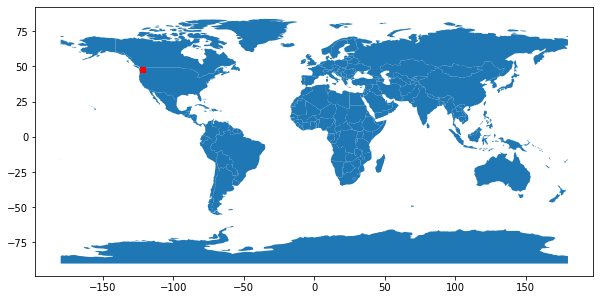

In [12]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [16]:
waterfront = df[(df['waterfront'] == 1)]
len(waterfront)
waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')
                        
for i in df.index:
    lat = df.lat[i]
    long = df.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
    
# waterfront_map

In [18]:
for i in df.index:
    lat = df.lat[i]
    long = df.long[i]
    price = df.price[i]
    sqft_living = df.sqft_living[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)

# waterfront_map

In [19]:
price75= df['price'].quantile(0.75)

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

# make a dataframe with the quantile
expensive = df[(df['price'] >= price75)]
expensive.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,day,month,geometry
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,0.0,98053,47.6561,-122.005,4760,101930,2014.0,12.0,5.0,POINT (-122.00500 47.65610)
10,1736800520,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,...,0.0,98007,47.6007,-122.145,2210,8925,2015.0,3.0,4.0,POINT (-122.14500 47.60070)
15,9297300055,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,...,0.0,98126,47.5714,-122.375,2140,4000,2015.0,24.0,1.0,POINT (-122.37500 47.57140)
21,2524049179,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,3,...,0.0,98040,47.5316,-122.233,4110,20336,2014.0,26.0,8.0,POINT (-122.23300 47.53160)
26,1794500383,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,...,0.0,98119,47.6386,-122.360,1760,3573,2014.0,26.0,6.0,POINT (-122.36000 47.63860)


In [25]:
df['price_bins'] = df.price.map(lambda x: 1 if x >= 0 and x <= 250000
                            else (2 if x > 250000 and x <= 500000
                                 else 3))
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,year,day,month,geometry,year_bins,price_bins
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,47.5112,-122.257,1340,5650,2014.0,13.0,10.0,POINT (-122.25700 47.51120),2,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,47.7210,-122.319,1690,7639,2014.0,9.0,12.0,POINT (-122.31900 47.72100),2,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,47.7379,-122.233,2720,8062,2015.0,25.0,2.0,POINT (-122.23300 47.73790),1,1
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,47.5208,-122.393,1360,5000,2014.0,9.0,12.0,POINT (-122.39300 47.52080),2,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,47.6168,-122.045,1800,7503,2015.0,18.0,2.0,POINT (-122.04500 47.61680),3,3


Text(0, 0.5, 'Longitude')

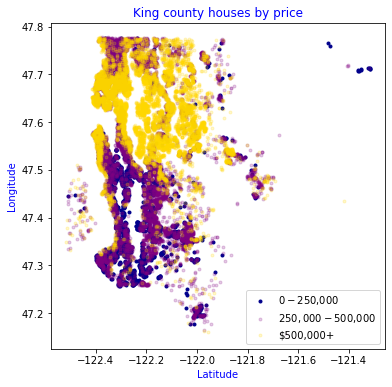

In [31]:
lat1 = df.loc[df['price_bins'] == 1].lat
long1 = df.loc[df['price_bins'] == 1].long

lat2 = df.loc[df['price_bins'] == 2].lat
long2 = df.loc[df['price_bins'] == 2].long

lat3 = df.loc[df['price_bins'] == 3].lat
long3 = df.loc[df['price_bins'] == 3].long

all_houses = plt.figure(figsize=(6,6))

plt.scatter(long1, lat1, label = '$0 - $250,000', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '$250,000 - $500,000', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '$500,000+', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by price', color = 'b')
plt.legend()

plt.xlabel('Latitude', color = 'b')
plt.ylabel('Longitude', color = 'b')